##### 1. Import library yang diperlukan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV (misalnya, orders.csv, order_details.csv, pizzas.csv)
orders = pd.read_csv('orders.csv')
order_details = pd.read_csv('order_details.csv')
pizzas = pd.read_csv('pizzas.csv')


In [10]:
orders

,order_id,date,time,year_month,hour
0,1,2015-01-01,11:38:36,2015-01,11
1,2,2015-01-01,11:57:40,2015-01,11
2,3,2015-01-01,12:12:28,2015-01,12
3,4,2015-01-01,12:16:31,2015-01,12
4,5,2015-01-01,12:21:30,2015-01,12
...,...,...,...,...,...
21345,21346,2015-12-31,20:51:07,2015-12,20
21346,21347,2015-12-31,21:14:37,2015-12,21
21347,21348,2015-12-31,21:23:10,2015-12,21
21348,21349,2015-12-31,22:09:54,2015-12,22


##### 2. Buat kolom baru dengan format tanggal tahun-bulan (YYYY-MM) dari tabel orders, dan buat line chart yang menunjukkan hitungan order_id dari setiap tahun-bulan. 

(Berapa banyak order yang kita dapat di setiap bulan? Bulan apa yang memiliki penjualan tertinggi? )

In [11]:
# Mengubah kolom 'date' menjadi format datetime jika diperlukan
orders['date'] = pd.to_datetime(orders['date'])

# Membuat kolom baru 'year_month' yang berisi tahun dan bulan
orders['year_month'] = orders['date'].dt.strftime('%Y-%m')
orders

,order_id,date,time,year_month,hour
0,1,2015-01-01,11:38:36,2015-01,11
1,2,2015-01-01,11:57:40,2015-01,11
2,3,2015-01-01,12:12:28,2015-01,12
3,4,2015-01-01,12:16:31,2015-01,12
4,5,2015-01-01,12:21:30,2015-01,12
...,...,...,...,...,...
21345,21346,2015-12-31,20:51:07,2015-12,20
21346,21347,2015-12-31,21:14:37,2015-12,21
21347,21348,2015-12-31,21:23:10,2015-12,21
21348,21349,2015-12-31,22:09:54,2015-12,22


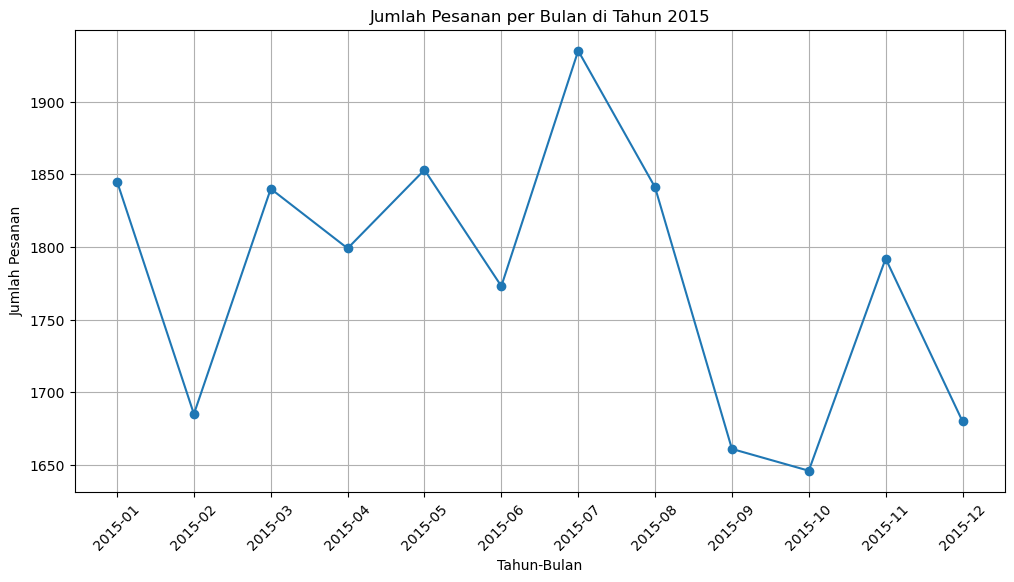

Bulan dengan penjualan tertinggi adalah 2015-07 dengan 1935 pesanan.


In [3]:
# Menghitung jumlah pesanan setiap bulan
monthly_orders = orders['year_month'].value_counts().sort_index()

# Membuat line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders.index, monthly_orders.values, marker='o')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Jumlah Pesanan')
plt.title('Jumlah Pesanan per Bulan di Tahun 2015')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Menampilkan bulan dengan penjualan tertinggi
max_month = monthly_orders.idxmax()
print(f'Bulan dengan penjualan tertinggi adalah {max_month} dengan {monthly_orders[max_month]} pesanan.')


##### 3. Buat dataset berdasarkan jam (hourly) dari tabel orders dan bar chart untuk mengidentifikasi jam-jam tersibuk. 

(Apakah ada jam-jam sibuk (peak hours)? 

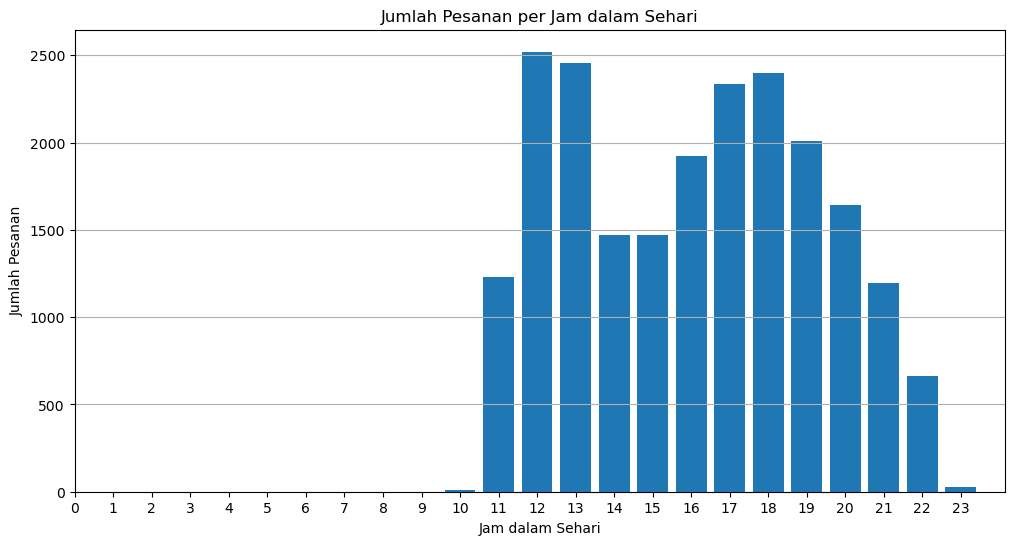

Jam sibuk (peak hour) adalah jam 12 dengan 2520 pesanan.


In [4]:
# Ekstrak jam dari kolom waktu
orders['hour'] = orders['time'].str.extract(r'(\d+):')[0].astype(int)

# Menghitung jumlah pesanan setiap jam
hourly_orders = orders['hour'].value_counts().sort_index()

# Membuat bar plot
plt.figure(figsize=(12, 6))
plt.bar(hourly_orders.index, hourly_orders.values)
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Pesanan')
plt.title('Jumlah Pesanan per Jam dalam Sehari')
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()

# Menampilkan jam sibuk
peak_hours = hourly_orders.idxmax()
print(f'Jam sibuk (peak hour) adalah jam {peak_hours} dengan {hourly_orders[peak_hours]} pesanan.')


##### 4. Gabungkan (join) order_details dengan tabel pizzas, dan buat bar plot yang menunjukkan total kuantitas setiap pizza_type_id, sort dalam urutan menurun (descending)

Pizza apa yang paling banyak dipesan? Bandingkan jumlah pesanan
pada tiap tipe pizza

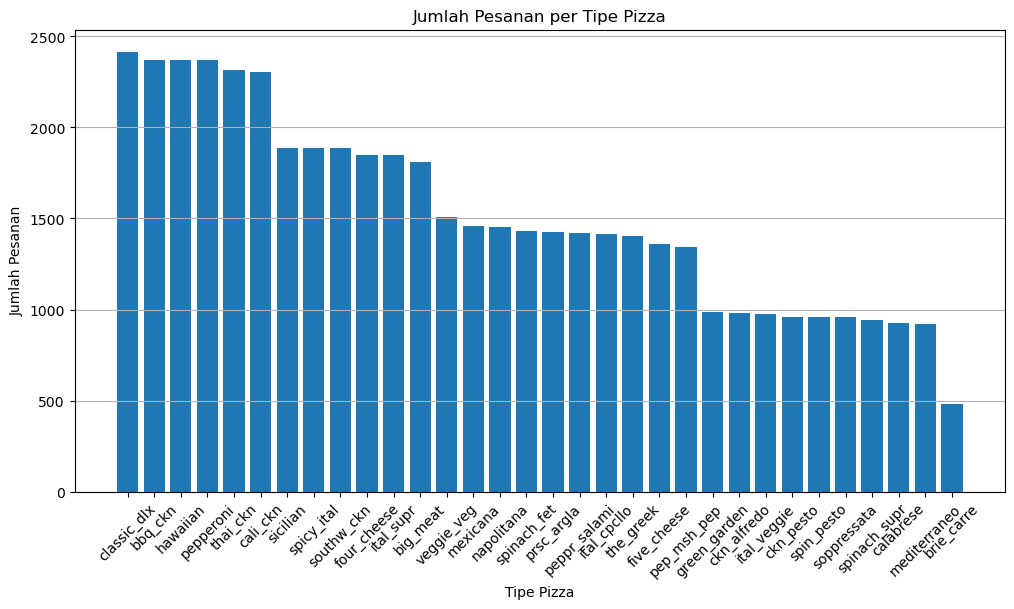

Pizza yang paling banyak dipesan adalah dengan tipe classic_dlx dengan 2416 pesanan.


In [5]:
# Gabungkan tabel order_details dengan tabel pizzas
merged_data = order_details.merge(pizzas, left_on='pizza_id', right_on='pizza_id')

# Menghitung jumlah pesanan setiap jenis pizza
pizza_orders = merged_data['pizza_type_id'].value_counts().sort_values(ascending=False)

# Membuat bar plot
plt.figure(figsize=(12, 6))
plt.bar(pizza_orders.index, pizza_orders.values)
plt.xlabel('Tipe Pizza')
plt.ylabel('Jumlah Pesanan')
plt.title('Jumlah Pesanan per Tipe Pizza')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Menampilkan jenis pizza yang paling banyak dipesan
most_ordered_pizza = pizza_orders.idxmax()
print(f'Pizza yang paling banyak dipesan adalah dengan tipe {most_ordered_pizza} dengan {pizza_orders[most_ordered_pizza]} pesanan.')


##### 5. Hitung revenue untuk masing-masing pizza size dengan formula revenue = quantity x price, dan buat pie chart untuk menunjukkan persentase kontribusi dari setiap pizza size

Bagaimana kontribusi revenue pada setiap ukuran pizza? 

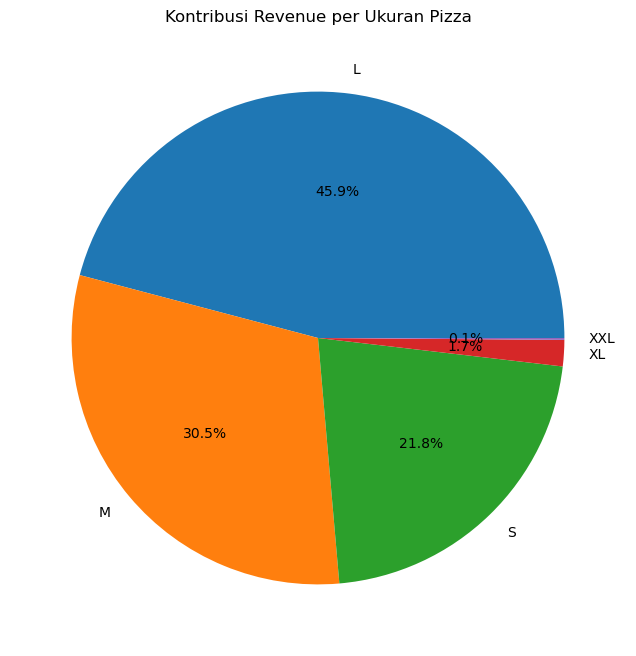

Ukuran yang memiliki kontribusi terbesar adalah L sebesar 45.9%.


In [28]:
# Menghitung revenue untuk setiap ukuran pizza
merged_data['revenue'] = merged_data['quantity'] * merged_data['price']

# Mengelompokkan berdasarkan ukuran pizza dan menghitung total revenue
pizza_size_revenue = merged_data.groupby('size')['revenue'].sum()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(pizza_size_revenue, labels=pizza_size_revenue.index, autopct='%1.1f%%')
plt.title('Kontribusi Revenue per Ukuran Pizza')
plt.show()

# Menampilkan ukuran pizza yang Revenue paling besar
max_size = pizza_size_revenue.idxmax()
max_percentage = (pizza_size_revenue / pizza_size_revenue.sum() * 100).loc[max_size]
print(f'Ukuran yang memiliki kontribusi terbesar adalah {max_size} sebesar {max_percentage:.1f}%.')

##### 6. Hitung revenue untuk masing-masing pizza_type dengan formula revenue = quantity x price, dan buat bar plot dari total revenue yang diberikan oleh masing-masing pizza_type 

Bagaimana kontribusi revenue pada setiap macam pizza (pizza type)?

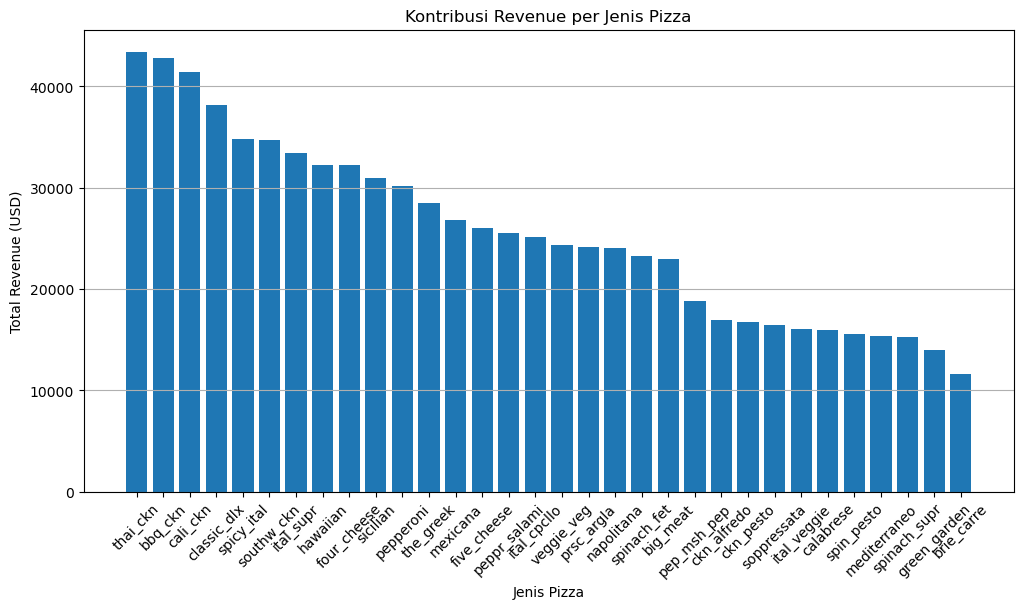

3 Jenis Pizza dengan Total Revenue Tertinggi:
- Jenis Pizza ID thai_ckn: Total Revenue USD 43434.25
- Jenis Pizza ID bbq_ckn: Total Revenue USD 42768.00
- Jenis Pizza ID cali_ckn: Total Revenue USD 41409.50


In [34]:
# Mengelompokkan berdasarkan jenis pizza dan menghitung total revenue
pizza_type_revenue = merged_data.groupby('pizza_type_id')['revenue'].sum().sort_values(ascending=False)

# Membuat bar plot
plt.figure(figsize=(12, 6))
plt.bar(pizza_type_revenue.index, pizza_type_revenue.values)
plt.xlabel('Jenis Pizza')
plt.ylabel('Total Revenue (USD)')
plt.title('Kontribusi Revenue per Jenis Pizza')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Menampilkan 3 jenis pizza dengan total revenue paling besar
top_3_pizza = pizza_type_revenue.head(3)
print("3 Jenis Pizza dengan Total Revenue Tertinggi:")
for idx, revenue in top_3_pizza.items():
    print(f"- Jenis Pizza ID {idx}: Total Revenue USD {revenue:.2f}")

In [42]:
print('Kesimpulan')
print(f'1. Bulan dengan penjualan tertinggi adalah {max_month} dengan {monthly_orders[max_month]} pesanan.')
print(f'2. Jam sibuk (peak hour) adalah jam {peak_hours} dengan {hourly_orders[peak_hours]} pesanan.')
print(f'3. Pizza yang paling banyak dipesan adalah dengan tipe {most_ordered_pizza} dengan {pizza_orders[most_ordered_pizza]} pesanan.')
print(f'4. Ukuran Pizza yang memiliki kontribusi terbesar adalah {max_size} sebesar {max_percentage:.1f}%.')
print("5. 3 Jenis Pizza dengan Total Revenue Tertinggi:")
for idx, revenue in top_3_pizza.items():
    print(f"  - Jenis Pizza ID {idx}: Total Revenue USD {revenue:.2f}")

Kesimpulan
1. Bulan dengan penjualan tertinggi adalah 2015-07 dengan 1935 pesanan.
2. Jam sibuk (peak hour) adalah jam 12 dengan 2520 pesanan.
3. Pizza yang paling banyak dipesan adalah dengan tipe classic_dlx dengan 2416 pesanan.
4. Ukuran Pizza yang memiliki kontribusi terbesar adalah L sebesar 45.9%.
5. 3 Jenis Pizza dengan Total Revenue Tertinggi:
  - Jenis Pizza ID thai_ckn: Total Revenue USD 43434.25
  - Jenis Pizza ID bbq_ckn: Total Revenue USD 42768.00
  - Jenis Pizza ID cali_ckn: Total Revenue USD 41409.50
